In [1]:
# intalling folium
!pip install folium

     |████████████████████████████████| 102kB 8.0MB/s ta 0:00:011


In [2]:
#pip install geopandas
#pip install geopy

In [2]:
# import pandas, numpy, matplotlib, seaborn, folium, requests, json, BeautifulSoup

# library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle data in a vectorized manner
import numpy as np


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
import folium 
import requests
import json
from bs4 import BeautifulSoup

# Nominatim converts an address into latitude and langitude values
from geopy.geocoders import Nominatim

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("all libraries have been imported");

all libraries have been imported


**2). Data scraping and transformation**

In [3]:
#use request.get to send a GET request to the specified url
url = "https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore"

r = requests.get(url)

#use 
singapore_html = BeautifulSoup(r.content)

In [4]:
#store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(singapore_html))

In [9]:
#use find "table"
plarea_tb = soup.find_all('table')[1]

In [10]:
# extract the charaters from the table
table_str = str(plarea_tb.extract())

In [11]:
# read the table into panda dataframe
singapore_df = pd.read_html(table_str)[0]

In [12]:
singapore_df.head()

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


In [13]:
#get the number of rows and columns in the table
singapore_df.shape

(55, 9)

In [14]:
#drop columns
sg_df = singapore_df.drop(['Malay', 'Chinese','Pinyin','Tamil','Region'], axis=1)

In [15]:
sg_df.head()

,Name (English),Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,13.94,163950,13400
1,Bedok,21.69,279380,13000
2,Bishan,7.62,88010,12000
3,Boon Lay,8.23,30,3.6
4,Bukit Batok,11.13,153740,14000


In [16]:
sg_df.shape

(55, 4)

In [17]:
sg_df.columns

Index(['Name (English)', 'Area (km2)', 'Population[7]', 'Density (/km2)'], dtype='object')

In [18]:

sg1_df = sg_df.rename(columns={"Name (English)": "Planning Area"})

In [19]:
sg2_df = sg1_df.rename(columns={"Population[7]": "Population"})

In [20]:
sg2_df.head()

,Planning Area,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,13.94,163950,13400
1,Bedok,21.69,279380,13000
2,Bishan,7.62,88010,12000
3,Boon Lay,8.23,30,3.6
4,Bukit Batok,11.13,153740,14000


In [21]:
sg2_df['Population']

0     163950
1     279380
2      88010
3         30
4     153740
5     151980
6     139280
7      77430
8          *
9       1830
10         *
11    190890
12     92420
13      2720
14    110200
15    226240
16     79240
17    264860
18    101520
19       110
20      2090
21         *
22         *
23     46390
24       420
25      8030
26        50
27     49210
28       990
29     18960
30    148020
31        40
32        90
33    170560
34     96340
35     10250
36     13340
37       250
38     95920
39    244600
40    116310
41         *
42      3070
43      1800
44         *
45       780
46    256730
47     21630
48        10
49    120650
50        70
51        10
52       720
53    254730
54    220320
Name: Population, dtype: object

In [22]:
population_na = sg2_df[sg2_df.Population == '*']

In [23]:
sg2_df.drop(population_na.index, inplace=True)

In [24]:
sg2_df.shape

(49, 4)

In [25]:
sg2_df.head()

,Planning Area,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,13.94,163950,13400
1,Bedok,21.69,279380,13000
2,Bishan,7.62,88010,12000
3,Boon Lay,8.23,30,3.6
4,Bukit Batok,11.13,153740,14000


In [26]:
sg2_df

,Planning Area,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,13.94,163950,13400
1,Bedok,21.69,279380,13000
2,Bishan,7.62,88010,12000
3,Boon Lay,8.23,30,3.6
4,Bukit Batok,11.13,153740,14000
5,Bukit Merah,14.34,151980,11000
6,Bukit Panjang,8.99,139280,15000
7,Bukit Timah,17.53,77430,4400
9,Changi,40.61,1830,80.62
11,Choa Chu Kang,6.11,190890,30000


In [27]:
# The code was removed by Watson Studio for sharing.

,Planning Area,Total,Pre-Primary,Primary,Secondary,Post-Secondary (Non-Tertiary),Polytechnic,Professional Qualification and Other Diploma,University
0,Total,765.3,57.4,262.3,205.7,58.7,79.8,10.4,90.9
1,Ang Mo Kio,31.8,3.0,11.7,8.2,2.3,3,0.2,3.4
2,Bedok,54.4,3.2,18.4,15.0,4.2,5.5,0.7,7.5
3,Bishan,17.5,1.3,5.8,4.1,1.5,1.4,0.4,3.1
4,Bukit Batok,29.3,1.8,8.4,8.1,2.3,3.6,0.7,4.4


In [28]:
sgedu_df.shape

(30, 9)

In [29]:
#sgedu1_df = sgedu_df.drop([0,29],  axis=0)

In [30]:
#sgedu1_df.head()

In [31]:
sgedu1_df = sgedu_df.drop(['Total','Pre-Primary','Primary','Polytechnic','Professional Qualification and Other Diploma', 'University'],  axis=1)

In [32]:
sgedu1_df.shape

(30, 3)

In [33]:
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary)
0,Total,205.7,58.7
1,Ang Mo Kio,8.2,2.3
2,Bedok,15.0,4.2
3,Bishan,4.1,1.5
4,Bukit Batok,8.1,2.3


In [34]:
sgedu1_df.columns

Index(['Planning Area', 'Secondary', 'Post-Secondary (Non-Tertiary)'], dtype='object')

In [35]:
sgedu1_df['Secondary Education in thousands'] = sgedu1_df.apply(lambda x: x['Secondary'] + x['Post-Secondary (Non-Tertiary)'], axis=1)

In [36]:
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary),Secondary Education in thousands
0,Total,205.7,58.7,264.4
1,Ang Mo Kio,8.2,2.3,10.5
2,Bedok,15.0,4.2,19.2
3,Bishan,4.1,1.5,5.6
4,Bukit Batok,8.1,2.3,10.4


In [37]:
sgedu1_df["Secondary Education"] = 1000*sgedu1_df["Secondary Education in thousands"]

In [38]:
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary),Secondary Education in thousands,Secondary Education
0,Total,205.7,58.7,264.4,264400.0
1,Ang Mo Kio,8.2,2.3,10.5,10500.0
2,Bedok,15.0,4.2,19.2,19200.0
3,Bishan,4.1,1.5,5.6,5600.0
4,Bukit Batok,8.1,2.3,10.4,10400.0


In [39]:
sgedu2_df=sgedu1_df.drop(['Secondary','Post-Secondary (Non-Tertiary)','Secondary Education in thousands'], axis=1)

In [40]:
sgedu2_df.head()

,Planning Area,Secondary Education
0,Total,264400.0
1,Ang Mo Kio,10500.0
2,Bedok,19200.0
3,Bishan,5600.0
4,Bukit Batok,10400.0


In [41]:
#sgedu3_df.astype({'Secondary Education':'int32'}).dtypes

In [42]:
#sgedu3_df.head()

In [43]:
sgpa_df = pd.merge(sg2_df, sgedu2_df, on='Planning Area')

In [44]:
sgpa_df.head()

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education
0,Ang Mo Kio,13.94,163950,13400,10500.0
1,Bedok,21.69,279380,13000,19200.0
2,Bishan,7.62,88010,12000,5600.0
3,Bukit Batok,11.13,153740,14000,10400.0
4,Bukit Merah,14.34,151980,11000,7600.0


In [45]:
sgpa_df.shape

(28, 5)

In [46]:
sgpa_df.dtypes

Planning Area           object
Area (km2)             float64
Population              object
Density (/km2)          object
Secondary Education    float64
dtype: object

In [47]:
sgpa_df['Density of Student Population(/km2)'] = sgpa_df.apply(lambda x: x['Secondary Education'] / x['Area (km2)'], axis=1)

In [48]:
sgpa_df.head()

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2)
0,Ang Mo Kio,13.94,163950,13400,10500.0,753.228121
1,Bedok,21.69,279380,13000,19200.0,885.200553
2,Bishan,7.62,88010,12000,5600.0,734.908136
3,Bukit Batok,11.13,153740,14000,10400.0,934.411500
4,Bukit Merah,14.34,151980,11000,7600.0,529.986053


In [49]:

body = client_142daae012664ad6b216ade3d03830eb.get_object(Bucket='thebattleofneighborhoodsweek5part-donotdelete-pr-zuikyxxgww6yug',Key='Planning Area laglon.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
latlong_df = pd.read_csv(body)
latlong_df.head()


,Planning Area,Latitude,Longitude
0,Ang Mo Kio,1.370073,103.849516
1,Bedok,1.323976,103.930216
2,Bishan,1.349057,103.749591
3,Bukit Batok,1.349057,103.749591
4,Bukit Merah,1.270439,103.828318


In [50]:
sgtc_df = pd.merge(sgpa_df, latlong_df, on='Planning Area')
sgtc_df.head()

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
0,Ang Mo Kio,13.94,163950,13400,10500.0,753.228121,1.370073,103.849516
1,Bedok,21.69,279380,13000,19200.0,885.200553,1.323976,103.930216
2,Bishan,7.62,88010,12000,5600.0,734.908136,1.349057,103.749591
3,Bukit Batok,11.13,153740,14000,10400.0,934.411500,1.349057,103.749591
4,Bukit Merah,14.34,151980,11000,7600.0,529.986053,1.270439,103.828318


In [51]:
sgtc_df.to_csv('Singapore Planning Area.csv',index=False)


**Visualisation of Data**

In [52]:
# use Nominatim to find out the latitude and longitude of Toronto

address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Singapore are {}. {}.'.format(latitude, longitude))

The geographical coordinate of Singapore are 1.357107. 103.8194992.


In [53]:
# store the Toronto's latitude and longitude info
singapore_latlong = [latitude, longitude]
print(singapore_latlong)

# use folium library to create a map of Toronto using latitude
# and longitude values
map_singapore = folium.Map(location=singapore_latlong, tiles="OpenStreetMap", zoom_start=10.5
                    )

# add markers to map
for lat, lng, label in zip(sgtc_df['Latitude'], sgtc_df['Longitude'],sgtc_df['Planning Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='#2E7D32',
        fill= True,
        fill_color='#2E7D32',
        fill_opacity=0.5,
        parse_html=False).add_to(map_singapore)
    
    
map_singapore

[1.357107, 103.8194992]


In [54]:
%matplotlib inline

import matplotlib as mpl

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


In [57]:
sgtc_df.set_index('Planning Area', inplace=True)

In [58]:
sgtc_df.head()

,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
Planning Area,,,,,,,
Ang Mo Kio,13.94,163950,13400,10500.0,753.228121,1.370073,103.849516
Bedok,21.69,279380,13000,19200.0,885.200553,1.323976,103.930216
Bishan,7.62,88010,12000,5600.0,734.908136,1.349057,103.749591
Bukit Batok,11.13,153740,14000,10400.0,934.411500,1.349057,103.749591
Bukit Merah,14.34,151980,11000,7600.0,529.986053,1.270439,103.828318


In [59]:
sgtc_df2 = sgtc_df.reset_index()

In [60]:
sgtc_df2.head()

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
0,Ang Mo Kio,13.94,163950,13400,10500.0,753.228121,1.370073,103.849516
1,Bedok,21.69,279380,13000,19200.0,885.200553,1.323976,103.930216
2,Bishan,7.62,88010,12000,5600.0,734.908136,1.349057,103.749591
3,Bukit Batok,11.13,153740,14000,10400.0,934.411500,1.349057,103.749591
4,Bukit Merah,14.34,151980,11000,7600.0,529.986053,1.270439,103.828318


In [61]:
df_density = sgtc_df2.loc[0:27, 'Density of Student Population(/km2)']
df_density.head()

0    753.228121
1    885.200553
2    734.908136
3    934.411500
4    529.986053
Name: Density of Student Population(/km2), dtype: float64

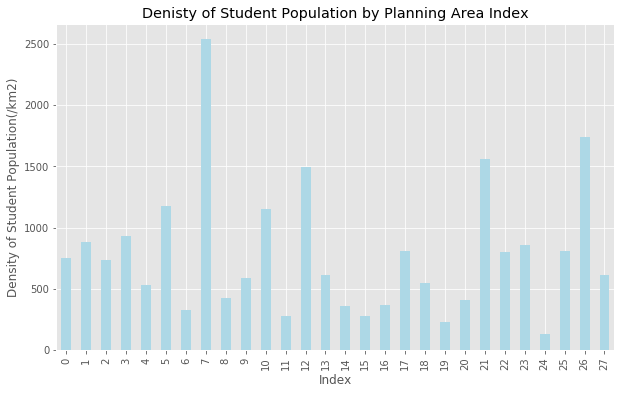

In [62]:
# step 2: plot data
df_density.plot(kind='bar', figsize=(10, 6), color='lightblue')

plt.xlabel('Index') # add to x-label to the plot
plt.ylabel('Density of Student Population(/km2)') # add y-label to the plot
plt.title('Denisty of Student Population by Planning Area Index') # add title to the plot

plt.show()

In [63]:
sgtc_df2.dtypes

Planning Area                           object
Area (km2)                             float64
Population                              object
Density (/km2)                          object
Secondary Education                    float64
Density of Student Population(/km2)    float64
Latitude                               float64
Longitude                              float64
dtype: object

In [64]:
sgtc_df2 = sgtc_df2.convert_objects(convert_numeric=True)
sgtc_df2.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Planning Area                           object
Area (km2)                             float64
Population                               int64
Density (/km2)                           int64
Secondary Education                    float64
Density of Student Population(/km2)    float64
Latitude                               float64
Longitude                              float64
dtype: object

In [65]:
df_densitypl = sgtc_df2.loc[0:27, 'Density (/km2)']
df_densitypl.head()

0    13400
1    13000
2    12000
3    14000
4    11000
Name: Density (/km2), dtype: int64

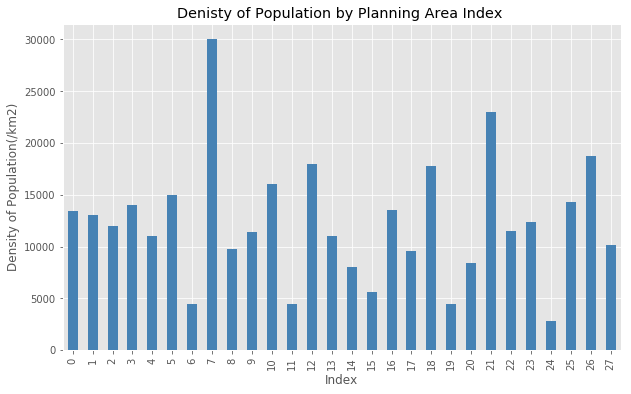

In [66]:
# step 2: plot data
df_densitypl.plot(kind='bar', figsize=(10, 6),color='steelblue')

plt.xlabel('Index') # add to x-label to the plot
plt.ylabel('Density of Population(/km2)') # add y-label to the plot
plt.title('Denisty of Population by Planning Area Index ') # add title to the plot

plt.show()

In [67]:
sgtc_df2.sort_values(by='Density of Student Population(/km2)', ascending=True, axis=0, inplace=True)

In [68]:
sgtc_df2.head()

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
24,Tanglin,7.63,21630,2800,1000.0,131.061599,1.306044,103.815280
19,Queenstown,20.43,96340,4400,4700.0,230.053842,1.294624,103.806045
11,Jurong East,17.83,79240,4400,4900.0,274.817723,1.333115,103.742297
15,Novena,8.98,49210,5600,2500.0,278.396437,1.320526,103.843881
6,Bukit Timah,17.53,77430,4400,5800.0,330.861380,1.354690,103.776372


In [69]:
sgtc2_top10 = sgtc_df2['Density of Student Population(/km2)'].tail(10)
sgtc2_top10

17     812.250333
23     861.656295
1      885.200553
3      934.411500
10    1148.600144
5     1179.087875
12    1497.617427
21    1558.073654
26    1736.571008
7     2536.824877
Name: Density of Student Population(/km2), dtype: float64

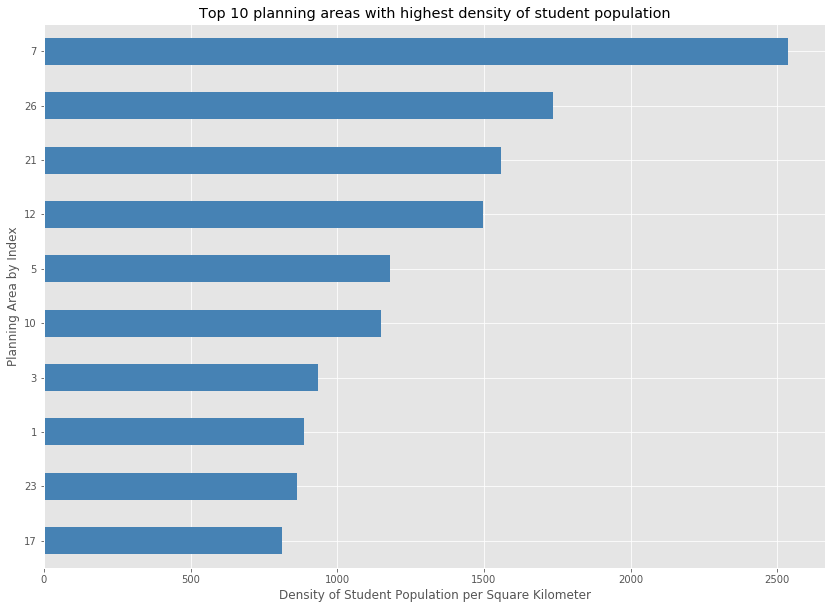

In [70]:
sgtc2_top10.plot(kind='barh', figsize=(14, 10), color='steelblue')
plt.xlabel('Density of Student Population per Square Kilometer')
plt.ylabel('Planning Area by Index')
plt.title('Top 10 planning areas with highest density of student population')


for index, value in enumerate(sgtc2_top10): 
    label = format(int(value), ',') # format int with commas
    

plt.show()

In [71]:
sgtc3_top10 = sgtc_df2.tail(10)
sgtc3_top10

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
17,Pasir Ris,15.02,148020,9600,12200.0,812.250333,1.373031,103.949255
23,Tampines,20.89,256730,12400,18000.0,861.656295,1.354653,103.943571
1,Bedok,21.69,279380,13000,19200.0,885.200553,1.323976,103.930216
3,Bukit Batok,11.13,153740,14000,10400.0,934.411500,1.349057,103.749591
10,Hougang,13.93,226240,16000,16000.0,1148.600144,1.370682,103.892545
5,Bukit Panjang,8.99,139280,15000,10600.0,1179.087875,1.378629,103.762136
12,Jurong West,14.69,264860,18000,22000.0,1497.617427,1.339636,103.707339
21,Sengkang,10.59,244600,23000,16500.0,1558.073654,1.391654,103.895364
26,Woodlands,13.59,254730,18700,23600.0,1736.571008,1.436897,103.786216
7,Choa Chu Kang,6.11,190890,30000,15500.0,2536.824877,1.384749,103.744534


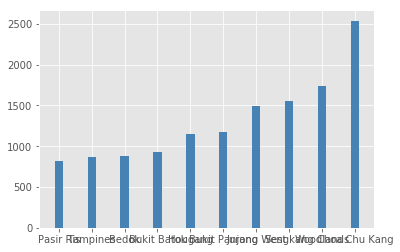

In [72]:
import matplotlib
import pylab as plt
import numpy as np

planning_area = [1,2,3,4,5,6,7,8,9,10]
density_of_student_population = sgtc3_top10['Density of Student Population(/km2)']
labels= sgtc3_top10['Planning Area']

plt.bar(planning_area, density_of_student_population, align='center', width=0.25, color='steelblue')
plt.xticks(planning_area, labels)
plt.show()



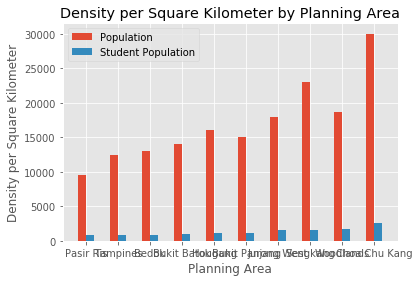

In [142]:
import matplotlib
import pylab as plt
import numpy as np

density_of_population = sgtc3_top10['Density (/km2)']
density_of_student_population = sgtc3_top10['Density of Student Population(/km2)']
labels= sgtc3_top10['Planning Area']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, density_of_population, width, label='Population')
rects2 = ax.bar(x + width/2, density_of_student_population, width, label='Student Population')

ax.set_ylabel('Density per Square Kilometer')
ax.set_xlabel('Planning Area')
ax.set_title('Density per Square Kilometer by Planning Area')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



plt.show()

In [84]:
path="C:\Singapore Planning Area.csv" 
sgtc3_top10.to_csv(path, index=False)



In [87]:
sgtc3_top10.to_csv('Singapore Planning Area.csv', index=False)

In [85]:
import os
cwd = os.getcwd()ds
print(cwd)

sgtc3_top10.to_csv(os.getcwd()+'\\Singapore Planning Area.csv')

/home/dsxuser/work
